<h2 style = "color:blue"> Projeto Mega - V2.JF </h2>
<h3> Análise preliminar dos Ganhadores </h3>
<img src = "imagens/LogoJoao-2019.png" alt="Nada" style = "float:left;width:100px; height:70px">

In [1]:
# imports iniciais 
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime
from IPython.core.display import HTML

%matplotlib inline

In [2]:
# Entrada do Dataset montado no notebook inicial 
data_path = "data/somenteGanadores.csv"
df = pd.read_csv(data_path, index_col="Concurso")
df.drop("Unnamed: 0", axis=1, inplace=True)
df.head(3)

,1ª Dezena,2ª Dezena,3ª Dezena,4ª Dezena,5ª Dezena,6ª Dezena,Ganhadores_Sena,Rateio_Sena
Concurso,,,,,,,,
2.0,9.0,39.0,37.0,49.0,43.0,41.0,1.0,2307162.23
3.0,36.0,30.0,10.0,11.0,29.0,47.0,2.0,391192.51
11.0,25.0,15.0,58.0,37.0,59.0,38.0,1.0,15591365.07


<h3 style="color:blue">Descrição da tabela:</h3>
    A tabela foi filtrada e removido os valores NaN, esta nova tabela foi salva em um arquivo CSV que foi importada
    acima.<br>
    <pre>Agora iremos processeguir com as anailises pretendidas neste projeto.</pre>
    

In [3]:
df.shape

(505, 8)

In [4]:
df2 = df.iloc[:,[0,1,2,3,4,5]]
df2.head(3)

,1ª Dezena,2ª Dezena,3ª Dezena,4ª Dezena,5ª Dezena,6ª Dezena
Concurso,,,,,,
2.0,9.0,39.0,37.0,49.0,43.0,41.0
3.0,36.0,30.0,10.0,11.0,29.0,47.0
11.0,25.0,15.0,58.0,37.0,59.0,38.0


In [42]:
df2.to_csv("data/dezenasGanhadorasSorteadas.csv")

<p> Neste novo dataframe teremos apenas os valores dos numeros sorteados e que representam os numeros nos 
quais houveram ganhadores </p>


<h3 style="color:blue"> Avaliação dos dados do dataframe de ganhadores:</h3>
<p> A partir desta limpeza inicial do dataframe, quero fazer algumas descobertas: </p>
<ol>
    <li style="color:green"> Numero de concursos vencedores até a data da extração do dataframe (Resolvido)</li>
    <li style="color:green"> Percentual de concursos vencedores (Resolvido) </li>
    <li> Dezenas mais sorteadas </li>
    <li> Dezenas menos sorteadas </li>
    <li> Dezenas não sorteadas </li>
</ol>

In [5]:
df2.size

3030

In [6]:
# Aqui fazemos a contagem de frenquencia de cada dezena separadamente. 
valores1 = pd.value_counts(df2["1ª Dezena"])
valores2 = pd.value_counts(df2["2ª Dezena"])
valores3 = pd.value_counts(df2["3ª Dezena"])
valores4 = pd.value_counts(df2["4ª Dezena"])
valores5 = pd.value_counts(df2["5ª Dezena"])
valores6 = pd.value_counts(df2["6ª Dezena"])

In [7]:
# Aqui crio um dataframe com o numero de ocorrencias de cada dezena sorteada
df3 = df2.apply(pd.Series.value_counts)
df3.head(4)

,1ª Dezena,2ª Dezena,3ª Dezena,4ª Dezena,5ª Dezena,6ª Dezena
1.0,13,10,13,11,10,7
2.0,12,6,6,4,7,10
3.0,6,18,11,4,12,13
4.0,16,5,10,8,14,2


In [41]:
df3.to_csv("data/freqDezenasGanhadores.csv")

In [8]:
#Podemos ver que o resultado mostra que em cada dezena os 60 numeros do jogo aparecem 
df3.count()

1ª Dezena    60
2ª Dezena    60
3ª Dezena    60
4ª Dezena    60
5ª Dezena    60
6ª Dezena    60
dtype: int64

In [9]:
# para determinar os numeros que mais aparecem nas apostas vencedoras acrescentamos a coluna onde somamos
# todos os valores

df3["Frequencia"] = df3[list(df3.columns)].sum(axis=1) #criamos uma coluna chamada frenquencia onde 
#somamos todas as colunas do dataframe df3 linha a linha 

In [10]:
df3.head(5)

,1ª Dezena,2ª Dezena,3ª Dezena,4ª Dezena,5ª Dezena,6ª Dezena,Frequencia
1.0,13,10,13,11,10,7,64
2.0,12,6,6,4,7,10,45
3.0,6,18,11,4,12,13,64
4.0,16,5,10,8,14,2,55
5.0,15,21,6,15,12,11,80


In [11]:
#agora vamos ordenar a coluna Frequencia por ordem do maior por menor e teremos os numeros mais sorteados 
# e os numeros menos sorteados 

df3_b = df3.sort_values(["Frequencia"], ascending=False)
display(HTML ('<h3 style= "color:blue"> <p> Tabela dos 5 números MAIS sorteados </p> </h3>'))
df3_b.head(5)

,1ª Dezena,2ª Dezena,3ª Dezena,4ª Dezena,5ª Dezena,6ª Dezena,Frequencia
5.0,15,21,6,15,12,11,80
10.0,12,13,13,7,17,11,73
33.0,10,11,11,13,12,10,67
1.0,13,10,13,11,10,7,64
3.0,6,18,11,4,12,13,64


In [12]:
display(HTML ('<h3 style= "color:blue"> <p> Tabela dos 5 números MENOS sorteados </p> </h3>'))
df3.tail(5)

,1ª Dezena,2ª Dezena,3ª Dezena,4ª Dezena,5ª Dezena,6ª Dezena,Frequencia
56.0,11,11,6,9,7,9,53
57.0,7,6,8,7,9,9,46
58.0,5,8,14,8,6,5,46
59.0,8,4,12,8,5,7,44
60.0,4,2,4,4,6,7,27


<h2 style="Color:red"> Conclusão:</h2>
    <p> Nesta nova etapa dos trabalhos podemos concluir que a dezena mais sorteada foi o <b>Número 5 com 80 ocorrrencias</b> e o menos sorteado foi o <b>Número 60 com 27 ocorrencias</b>.
    Lembramos que estes dados provem da tabela de jogos da Caixa que representa os sorteios onde houveram vencedores e não corresponde ao total dos sorteios. Em outra etapa fareio levantamento de todos os sorteios retirando apenas os dados missing NaN. </p>

In [18]:
df3.head(5)

,1ª Dezena,2ª Dezena,3ª Dezena,4ª Dezena,5ª Dezena,6ª Dezena,Frequencia
1.0,13,10,13,11,10,7,64
2.0,12,6,6,4,7,10,45
3.0,6,18,11,4,12,13,64
4.0,16,5,10,8,14,2,55
5.0,15,21,6,15,12,11,80


In [35]:
#Gerando eixo x com os numeros de 1 a 60 que correspondem as dezenas sorteadas
num = []
for i in range(1,61,1):
    num.append(i)


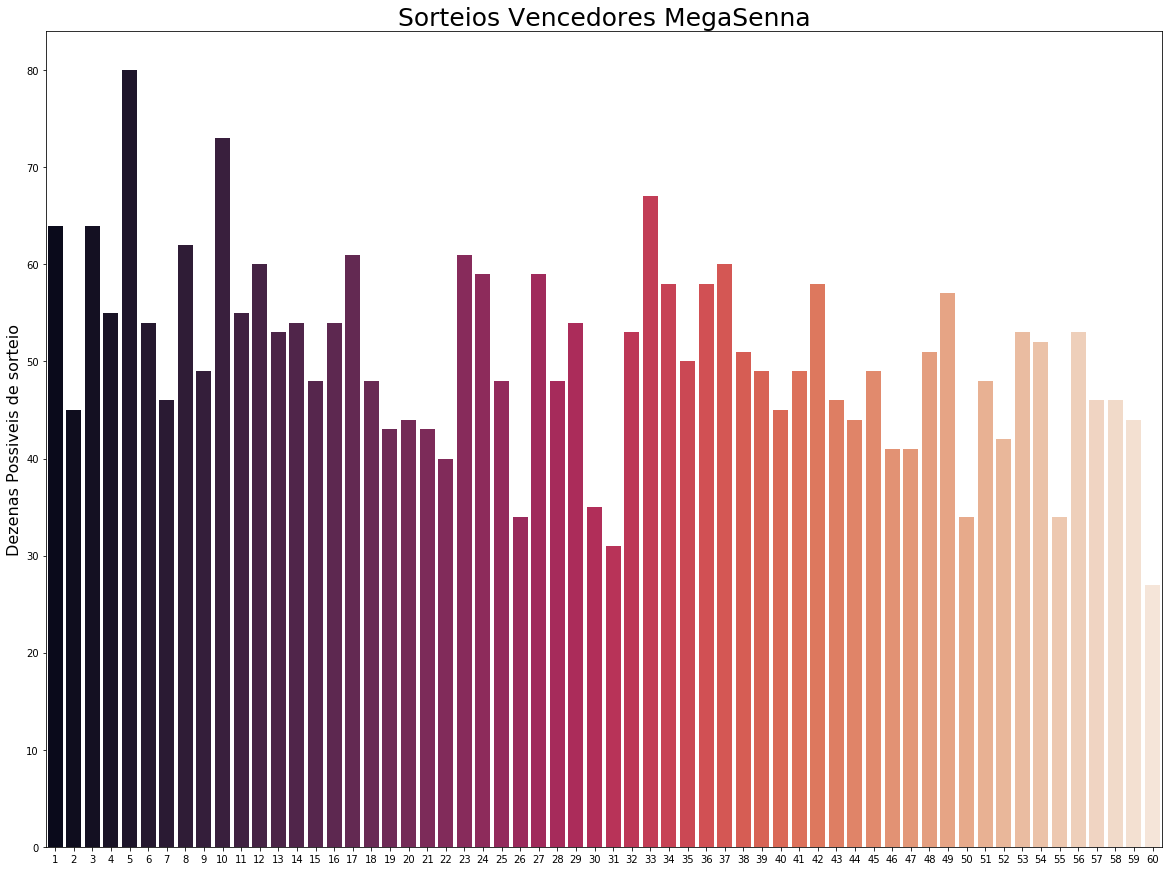

In [40]:
#hitogramda dos dados de sorteio vencedores
fig, ax = plt.subplots(figsize=(20,15))

sns.barplot(x = num, y = "Frequencia", palette="rocket", data=df3)
ax.set_title('Sorteios Vencedores MegaSenna', fontsize=25)
ax.yaxis.set_label_text('Dezenas Possiveis de sorteio', fontdict={'size':16})
plt.show()

In [43]:
fig.savefig('imagens/maisSorteados.png')